In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import missingno as msno
from sklearn.metrics.pairwise import cosine_similarity, linear_kernel
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

In [6]:
# load data
book_features = pd.read_csv('data/books_data.csv', low_memory=False)

ratings = pd.read_csv('data/Books_rating.csv', low_memory=False)


In [7]:
book_features.head()

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['Fiction'],NaN
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,['Edward Long'],NaN,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,2003-03-01,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,NaN


In [8]:
ratings.head()

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


## Summary Statistics ##

In [9]:
book_features.describe()


,ratingsCount
count,49752.000000
mean,21.252975
std,201.340431
min,1.000000
25%,1.000000
50%,2.000000
75%,5.000000
max,4895.000000


In [10]:
ratings.describe()

,Price,review/score,review/time
count,481171.000000,3.000000e+06,3.000000e+06
mean,21.762656,4.215289e+00,1.132307e+09
std,26.206541,1.203054e+00,1.493202e+08
min,1.000000,1.000000e+00,-1.000000e+00
25%,10.780000,4.000000e+00,9.999072e+08
50%,14.930000,5.000000e+00,1.128298e+09
75%,23.950000,5.000000e+00,1.269130e+09
max,995.000000,5.000000e+00,1.362355e+09


## Checking missing values ##

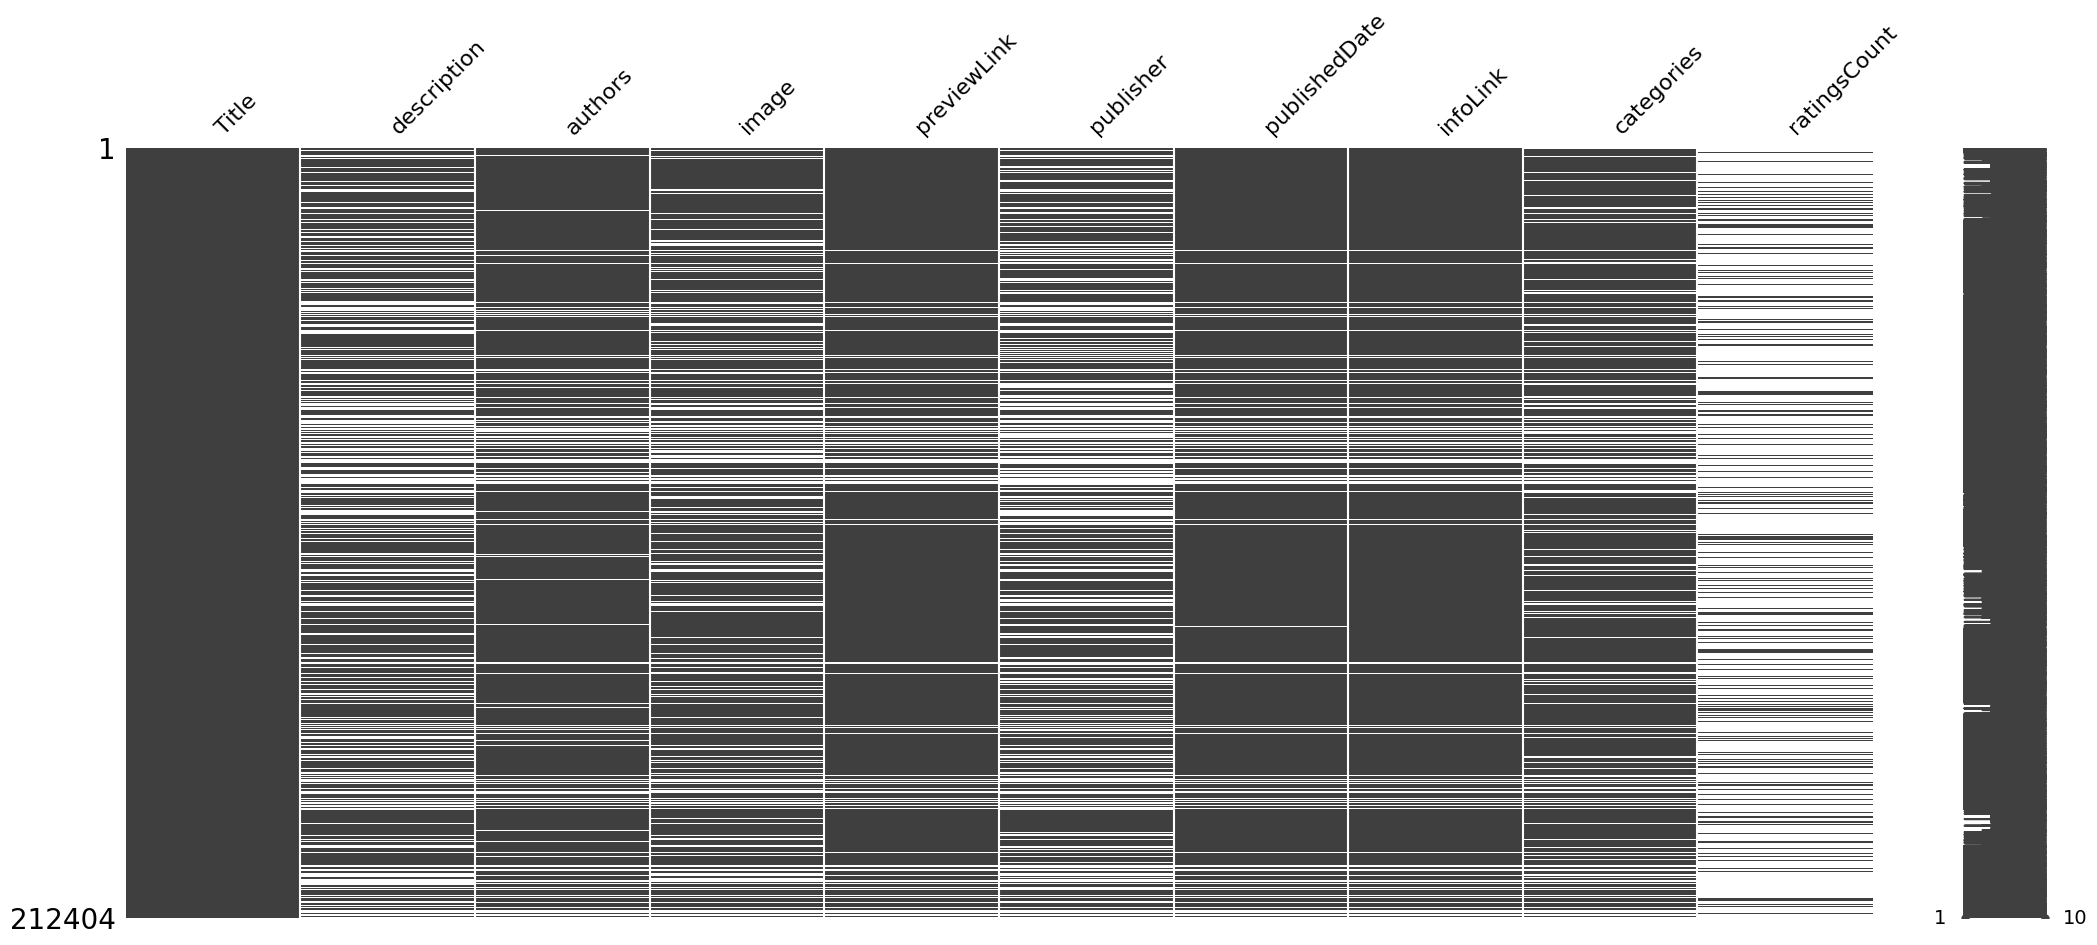

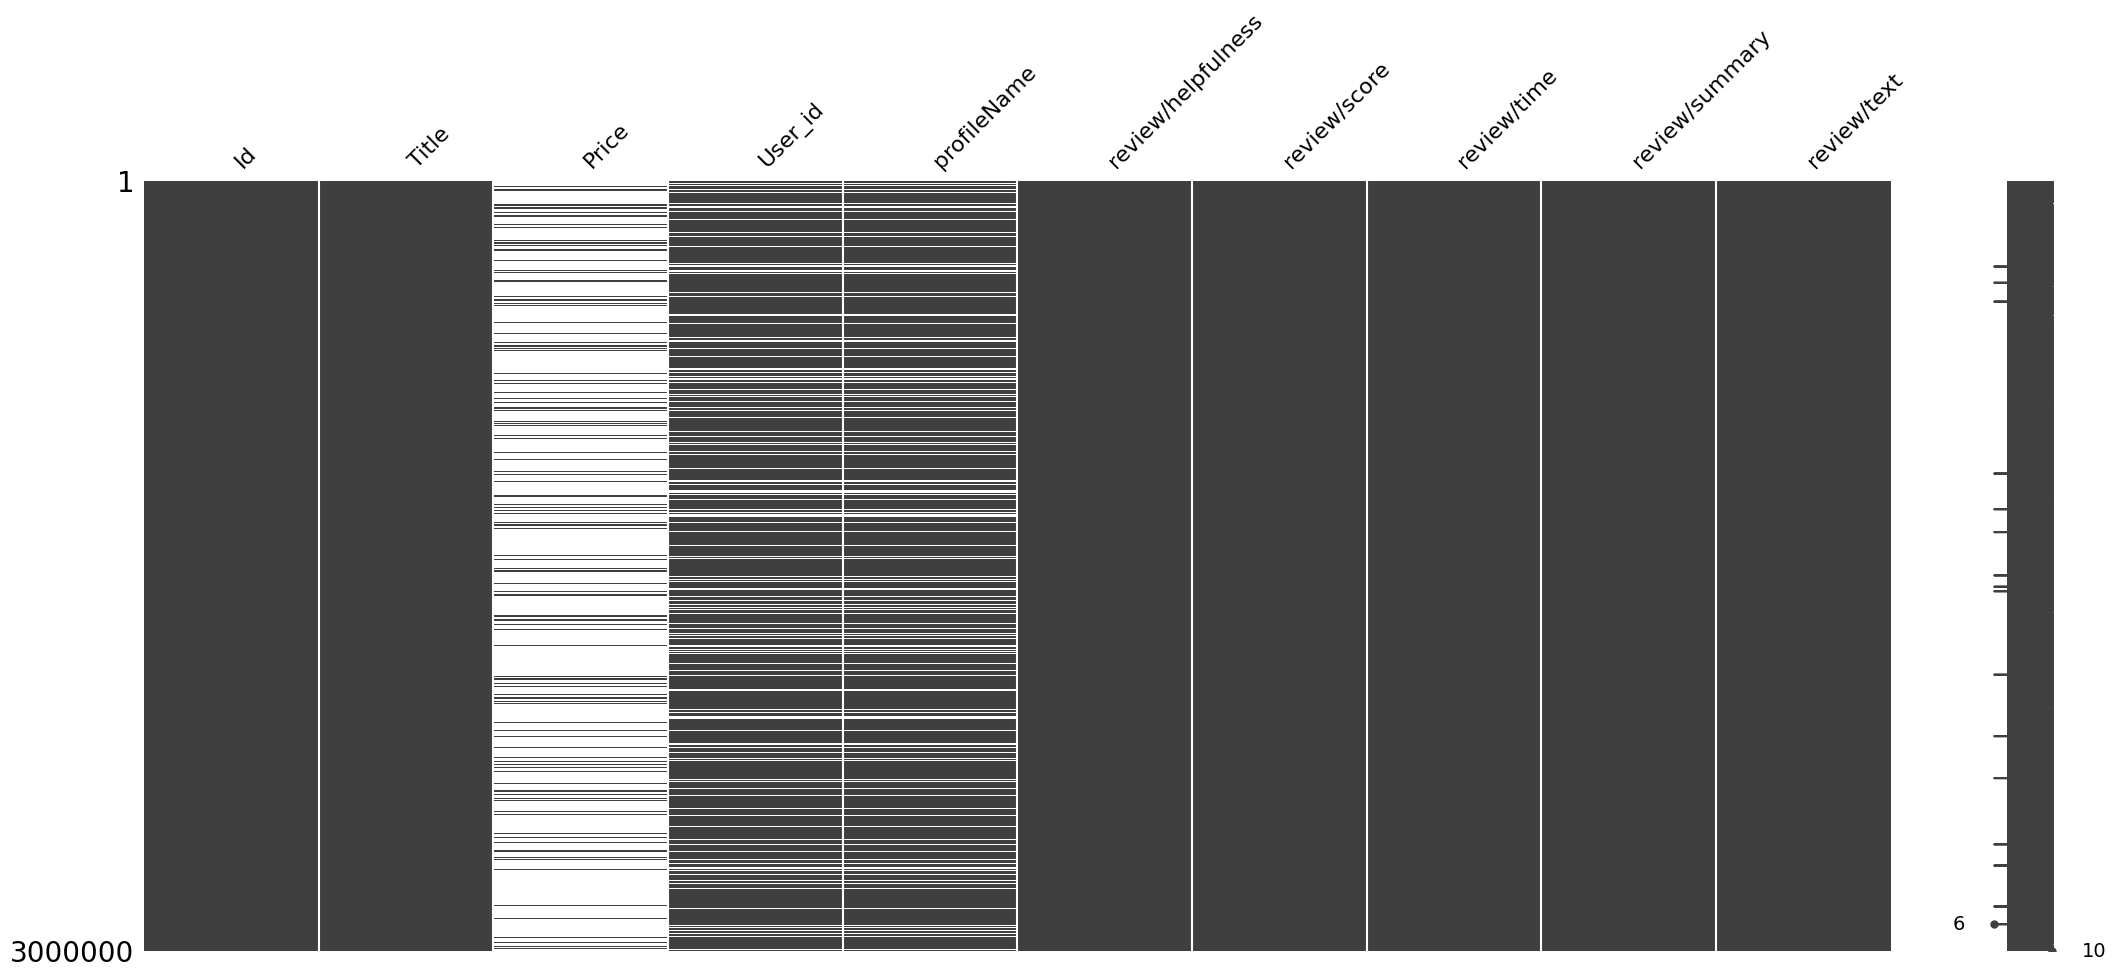

Title                 1
description       68442
authors           31413
image             52075
previewLink       23836
publisher         75886
publishedDate     25305
infoLink          23836
categories        41199
ratingsCount     162652
dtype: int64
Id                          0
Title                     208
Price                 2518829
User_id                561787
profileName            561905
review/helpfulness          0
review/score                0
review/time                 0
review/summary            407
review/text                 8
dtype: int64


In [11]:
# Visualize missing values
msno.matrix(book_features)
plt.show()

msno.matrix(ratings)
plt.show()

# Calculate missing values
print(book_features.isnull().sum())
print(ratings.isnull().sum())


## Data Cleaning ##
### Handling missing data and duplicates ###


In [12]:
# Handle missing values in books dataframe
book_features = book_features.dropna(subset=['Title', 'description', 'authors'])

# Handle missing values in ratings dataframe
ratings = ratings.dropna(subset=['Title', 'review/score'])

# Remove duplicates if any
book_features = book_features.drop_duplicates(subset=['Title'])
ratings = ratings.drop_duplicates(subset=['Id'])


### Checking for data types and converting ###

In [13]:
# Check data types
print(book_features.dtypes)
print(ratings.dtypes)

# Convert data types if necessary
book_features['publishedDate'] = pd.to_datetime(book_features['publishedDate'], errors='coerce')
ratings['review/time'] = pd.to_datetime(ratings['review/time'], unit='s')


Title             object
description       object
authors           object
image             object
previewLink       object
publisher         object
publishedDate     object
infoLink          object
categories        object
ratingsCount     float64
dtype: object
Id                     object
Title                  object
Price                 float64
User_id                object
profileName            object
review/helpfulness     object
review/score          float64
review/time             int64
review/summary         object
review/text            object
dtype: object


### Exploratory Data Analysis ###

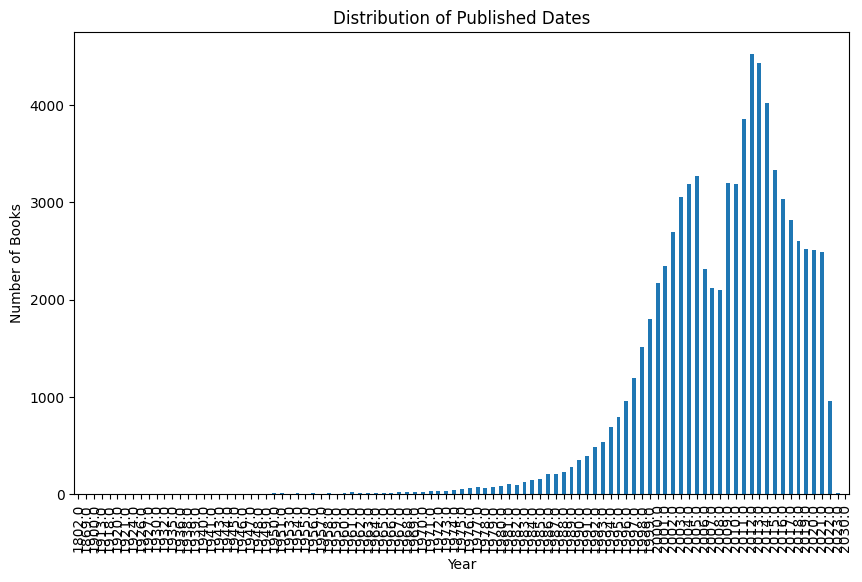

In [14]:
# Distribution of published dates
plt.figure(figsize=(10,6))
book_features['publishedDate'].dt.year.value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Published Dates')
plt.xlabel('Year')
plt.ylabel('Number of Books')
plt.show()


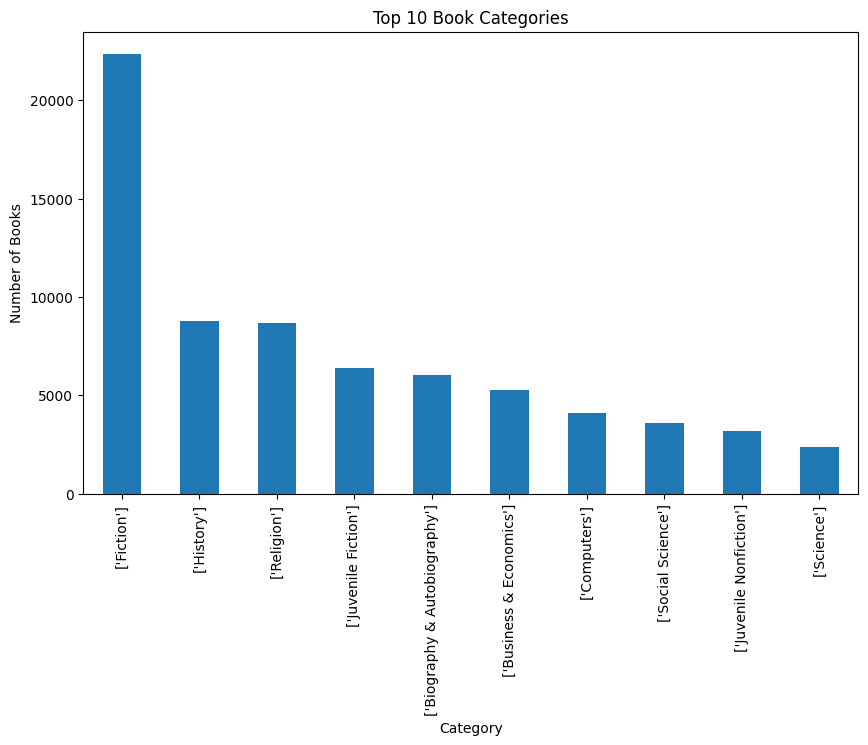

In [15]:
# Top categories
top_categories = book_features['categories'].value_counts().head(10)
plt.figure(figsize=(10,6))
top_categories.plot(kind='bar')
plt.title('Top 10 Book Categories')
plt.xlabel('Category')
plt.ylabel('Number of Books')
plt.show()


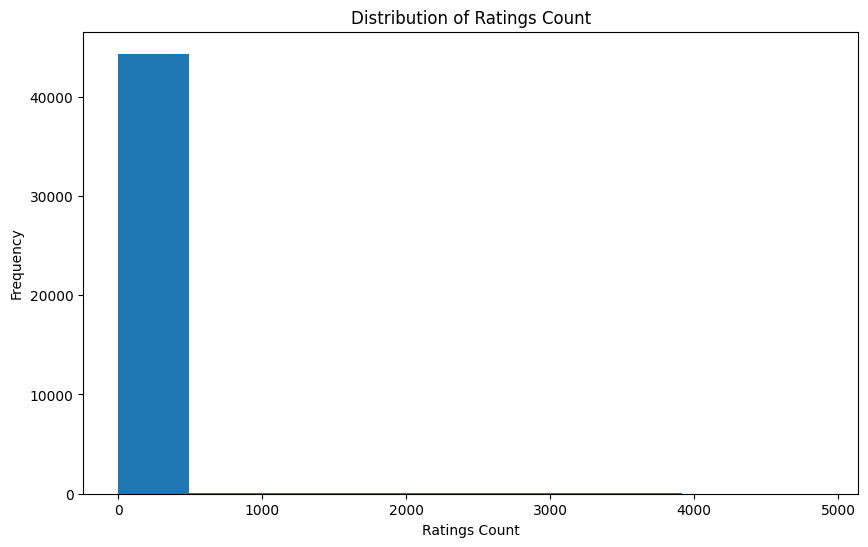

In [16]:
# Rating count distribution
plt.figure(figsize=(10,6))
plt.hist(book_features['ratingsCount'], bins=10)
plt.title('Distribution of Ratings Count')
plt.xlabel('Ratings Count')
plt.ylabel('Frequency')
plt.show()


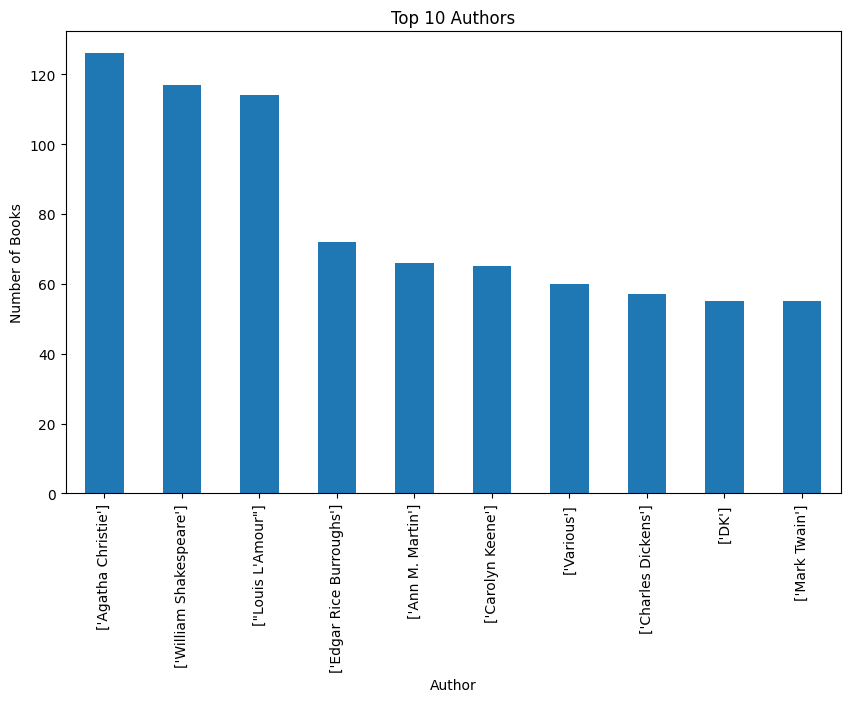

In [17]:
# Authors Analysis
top_authors = book_features['authors'].value_counts().head(10)
plt.figure(figsize=(10,6))
top_authors.plot(kind='bar')
plt.title('Top 10 Authors')
plt.xlabel('Author')
plt.ylabel('Number of Books')
plt.show()


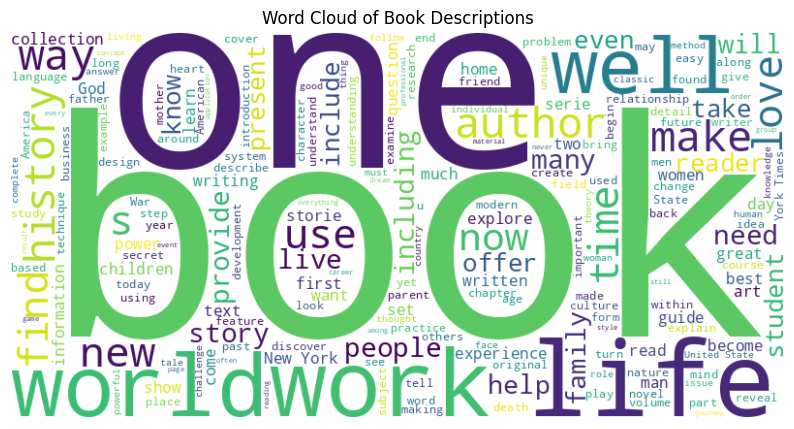

In [18]:
# Word count of description
text = ' '.join(book_features['description'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Book Descriptions')
plt.show()


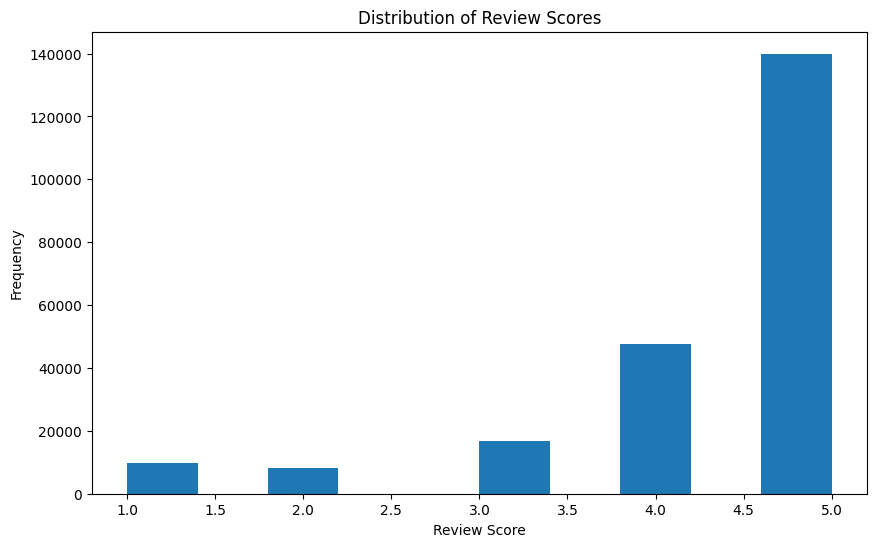

In [19]:
# Distribution of review scores
plt.figure(figsize=(10,6))
plt.hist(ratings['review/score'], bins=10)
plt.title('Distribution of Review Scores')
plt.xlabel('Review Score')
plt.ylabel('Frequency')
plt.show()


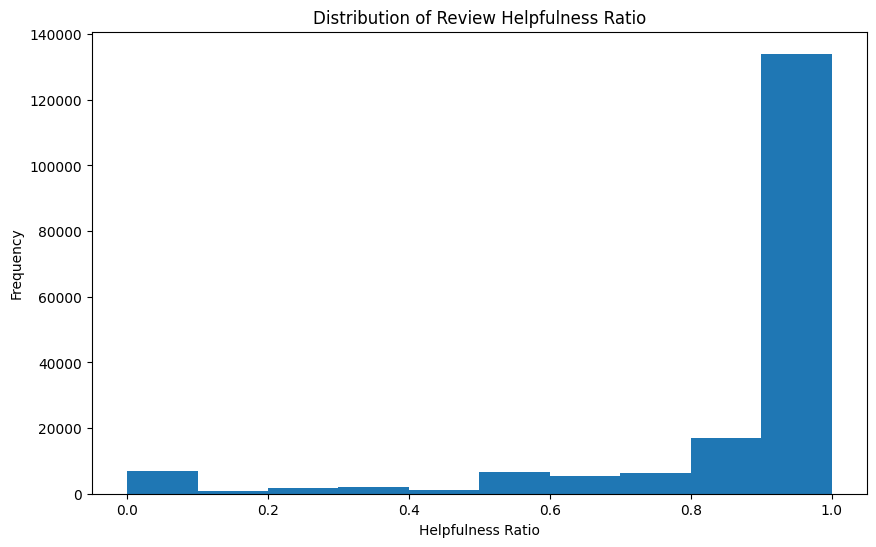

In [20]:
# Distribution of review/helpfulness
ratings['helpfulness_numerator'] = ratings['review/helpfulness'].apply(lambda x: int(x.split('/')[0]))
ratings['helpfulness_denominator'] = ratings['review/helpfulness'].apply(lambda x: int(x.split('/')[1]))
ratings['helpfulness_ratio'] = ratings['helpfulness_numerator'] / ratings['helpfulness_denominator']

plt.figure(figsize=(10,6))
plt.hist(ratings['helpfulness_ratio'].dropna(), bins=10)
plt.title('Distribution of Review Helpfulness Ratio')
plt.xlabel('Helpfulness Ratio')
plt.ylabel('Frequency')
plt.show()


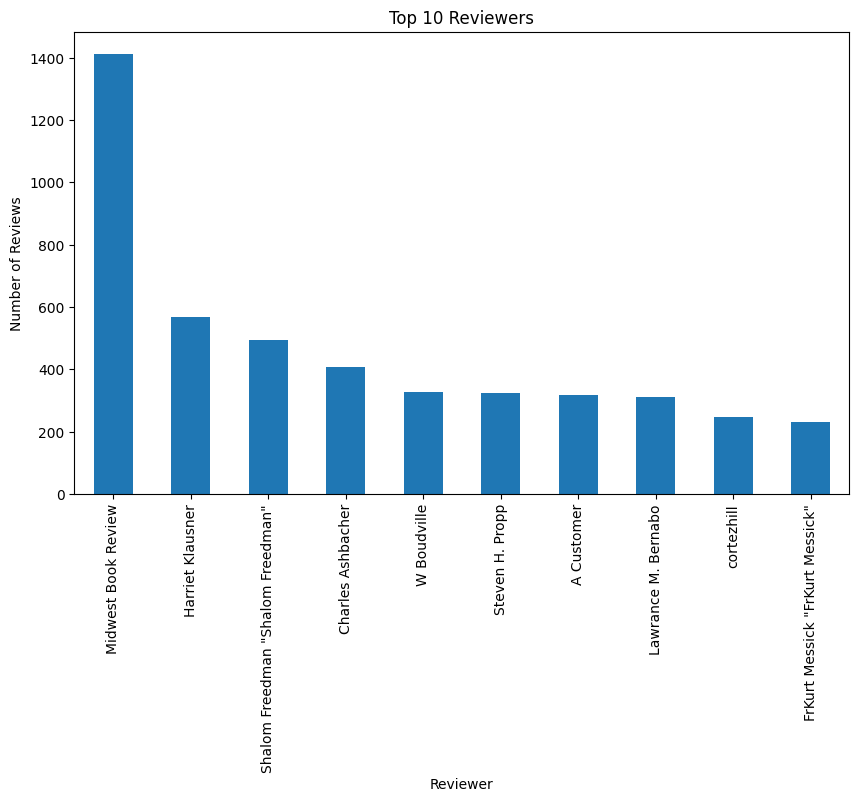

In [21]:
# Top reviewers:
top_reviewers = ratings['profileName'].value_counts().head(10)
plt.figure(figsize=(10,6))
top_reviewers.plot(kind='bar')
plt.title('Top 10 Reviewers')
plt.xlabel('Reviewer')
plt.ylabel('Number of Reviews')
plt.show()


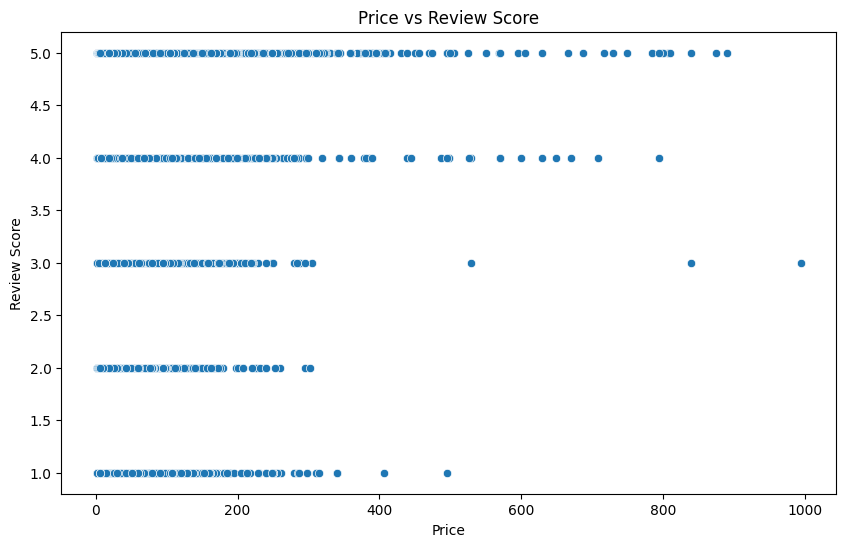

In [22]:
# Checking for correlation between price and review score:
plt.figure(figsize=(10,6))
sns.scatterplot(data=ratings, x='Price', y='review/score')
plt.title('Price vs Review Score')
plt.xlabel('Price')
plt.ylabel('Review Score')
plt.show()


## Features Engineering 
### Calculating Rating Count and Average Rating ###


In [23]:
# Calculate the rating count for each book
rating_counts = ratings.groupby('Title').size().reset_index(name='rating_count')

# Calculate the average rating for each book
average_ratings = ratings.groupby('Title')['review/score'].mean().reset_index(name='average_rating')

# Merge these features into the books dataframe
book_features = book_features.merge(rating_counts, on='Title', how='left')
book_features = book_features.merge(average_ratings, on='Title', how='left')

# Fill NaN values with 0 for rating_count and with the average rating for average_rating
book_features['ratingsCount'] = book_features['ratingsCount'].fillna(0)
book_features['average_rating'] = book_features['average_rating'].fillna(book_features['average_rating'].mean())


In [24]:
book_features[['Title', 'rating_count', 'average_rating']].head()


,Title,rating_count,average_rating
0,Dr. Seuss: American Icon,1,5.0
1,Wonderful Worship in Smaller Churches,1,5.0
2,Whispers of the Wicked Saints,1,1.0
3,The Church of Christ: A Biblical Ecclesiology ...,1,5.0
4,Saint Hyacinth of Poland,1,5.0


### Summary statistics for the new features ###

In [25]:
book_features[['rating_count', 'average_rating']].describe()


,rating_count,average_rating
count,141755.000000,141755.000000
mean,1.049423,4.348300
std,0.286355,1.056146
min,1.000000,1.000000
25%,1.000000,4.000000
50%,1.000000,5.000000
75%,1.000000,5.000000
max,14.000000,5.000000


### Checking the distribution of the new features ###

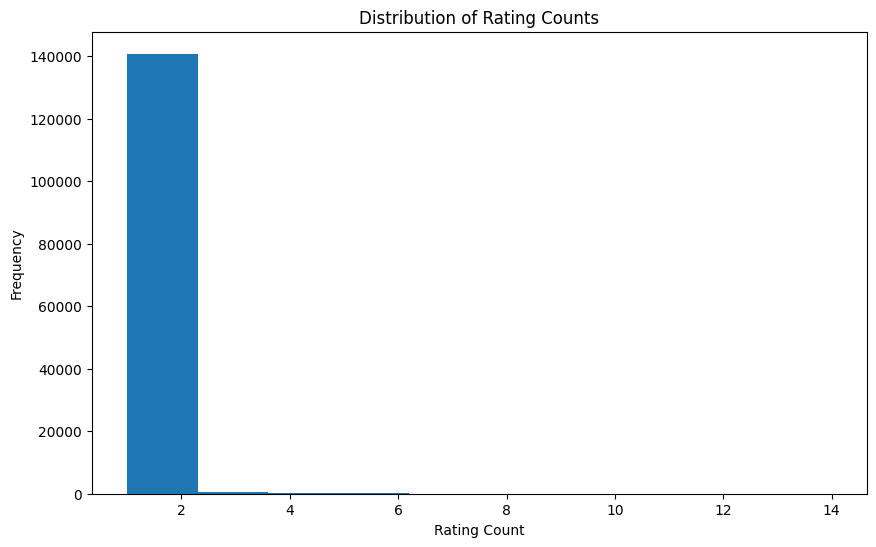

In [26]:
plt.figure(figsize=(10, 6))
plt.hist(book_features['rating_count'], bins=10)
plt.title('Distribution of Rating Counts')
plt.xlabel('Rating Count')
plt.ylabel('Frequency')
plt.show()


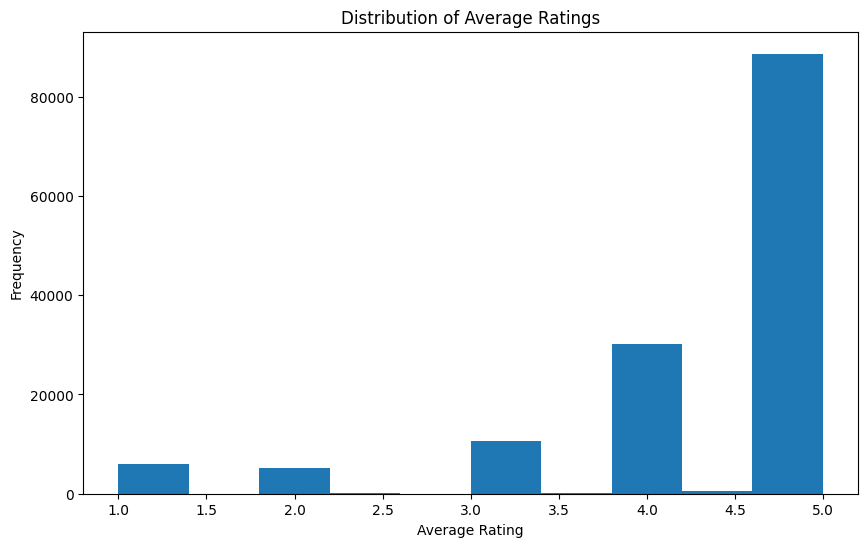

In [27]:
plt.figure(figsize=(10, 6))
plt.hist(book_features['average_rating'], bins=10)
plt.title('Distribution of Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()


In [28]:
# Combine relevant text features for vectorization
book_features['description'] = book_features['description'].fillna('').str.strip().str.lower()
book_features['Title'] = book_features['Title'].fillna('')
book_features['authors'] = book_features['authors'].fillna('')
book_features['categories'] = book_features['categories'].fillna('')
book_features['combined_text'] = book_features['Title'] + ' ' + book_features['description'] + ' ' + book_features['authors'] + ' ' + book_features['categories']


# Verify the combined text column
print(book_features[['Title', 'combined_text']].head())


                                               Title   
0                           Dr. Seuss: American Icon  \
1              Wonderful Worship in Smaller Churches   
2                      Whispers of the Wicked Saints   
3  The Church of Christ: A Biblical Ecclesiology ...   
4                           Saint Hyacinth of Poland   

                                       combined_text  
0  Dr. Seuss: American Icon philip nel takes a fa...  
1  Wonderful Worship in Smaller Churches this res...  
2  Whispers of the Wicked Saints julia thomas fin...  
3  The Church of Christ: A Biblical Ecclesiology ...  
4  Saint Hyacinth of Poland the story for childre...  


In [29]:
# Reduce book_data by 50%
book_data_reduced = book_features.sample(frac=0.98, random_state=42)

# Reduce book_rating by 50%
book_rating_reduced = ratings.sample(frac=0.98, random_state=42)

# Check the size of the reduced data
print(f'Reduced book_data size: {book_data_reduced.shape}')
print(f'Reduced book_rating size: {book_rating_reduced.shape}')


Reduced book_data size: (138920, 13)
Reduced book_rating size: (217549, 13)


In [30]:
# Creating a TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english')

# Transform documents into TF-IDF matrix
tfidf_matrix = tfidf.fit_transform(book_data_reduced['combined_text'])

# Use Nearest Neighbors to find similarities
nn = NearestNeighbors(metric='cosine', algorithm='brute')
nn.fit(tfidf_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [31]:
# Create a new mapping from book titles to their indices for the reduced dataset
indices_reduced = pd.Series(book_data_reduced.index, index=book_data_reduced['Title']).drop_duplicates()

In [32]:
def get_recommendations_nn(title, n_recommendations=10):
    # Get the index of the book that matches the title
    idx = indices_reduced[title]

    # Get the TF-IDF vector for the book
    book_vec = tfidf_matrix[idx]

    # Find the nearest neighbors
    distances, indices_nn = nn.kneighbors(book_vec, n_neighbors=n_recommendations+1)

    # Get the indices of the most similar books
    book_indices = indices_nn[0][1:]

    # Return the top most similar books
    return book_data_reduced[['Title', 'authors', 'categories', 'average_rating', 'ratingsCount']].iloc[book_indices]



In [33]:
# usage
example_title = book_data_reduced['Title'].iloc[1]
recommendations = get_recommendations_nn(example_title)
recommendations

,Title,authors,categories,average_rating,ratingsCount
58980,Sinai tapestry: A novel,['Edward Whittemore'],['Fiction'],5.0,2.0
49807,100 Hours to Suez: The Epic Story of Israel's ...,['David Tal'],['History'],5.0,0.0
92181,Writing Gender History (Writing History),['Laura Lee Downs'],['History'],5.0,0.0
139165,World History,['Peter Haugen'],['History'],3.0,0.0
67117,Learn Mishnah,['Jacob Neusner'],['Juvenile Nonfiction'],5.0,0.0
69324,Site Matters,"['Andrea Kahn', 'Carol Burns']","['Architecture, Modern']",5.0,0.0
67078,"The American heritage history of World War I,",['Stephen E. Ambrose'],['History'],5.0,0.0
99448,Site 18: Short stories from a remote radar sit...,['Richard E. Waldron'],['History'],5.0,0.0
12680,From Central Park to Sinai: How I Found My Jew...,['Roy Salant Neuberger'],['Religion'],5.0,0.0
106123,The Hope,['Herman Wouk'],['Fiction'],5.0,4.0


In [35]:
example_title = book_data_reduced['Title'].iloc[5]
example_title

'The Western Trail (Trail Drive)'

In [36]:
from sklearn.metrics import f1_score, precision_score, recall_score

def evaluate_recommendations_nn(title, true_similar_titles):
    # Get the recommendations
    recommended_books = get_recommendations_nn(title)
    
    # Extract the titles of the recommended books
    recommended_titles = recommended_books['Title'].tolist()
    
    # Calculate precision, recall, and F1 score
    y_true = [1 if title in true_similar_titles else 0 for title in recommended_titles]
    y_pred = [1] * len(recommended_titles)  # All recommended books are considered as predicted positive
    
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    return precision, recall, f1




In [37]:
# Example ground truth similar titles
true_similar_titles = ['Book1', 'Book2', 'Book3', 'Book4', 'Book5', 'Book6', 'Book7', 'Book8', 'Book9', 'Book10']

# Example usage
precision, recall, f1 = evaluate_recommendations_nn(example_title, true_similar_titles)
print(f'Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}')

Precision: 0.00, Recall: 0.00, F1 Score: 0.00


/Users/ono/Desktop/neuefische/ds-capstone-project-ono/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
